In [1]:
import pandas as pd
import seaborn as sns


In [ ]:


def make_sales():
    '''function to make df for sales data'''
    sales = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/opioidPrescriptionSales.csv")
    sales['Type'] = sales['Oxycodone / Hydrocodone'].str.replace('/', '')
    #sales['Data Type'] = sales['Data Type'].str.replace('  ', '_')
    sales = sales[["Fips", "Location","TimeFrame","Type", "Data", ]]
    sales= sales.query("Type == 'Oxycodone'")
    #sales = sales.groupby("Data").median().reset_index()
    #sales.query("TimeFrame == 2018")
    #return sales.query("TimeFrame == 2018 and Type == 'Oxycodone'")
    sales = sales.rename(columns={"Data":"SalesData"})
    return sales
make_sales()



In [ ]:


def make_deaths():
    '''function to make df for deaths data'''
    deaths = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/drugPoisoningDeaths.csv")
    #sales['Type'] = sales['Oxycodone / Hydrocodone'].str.replace('/', '')
    #sales['Data Type'] = sales['Data Type'].str.replace('  ', '_')
    deaths = deaths[["Fips", "Location","TimeFrame","Drug Type", "Data", ]]
    #deaths= deaths.query("TimeFrame == 2018") #and 'Drug Type' == 'All opioids')
    
    deaths= deaths.query("`Drug Type` == 'All opioids'")
    #deaths = deaths.groupby("Data").median().reset_index()
    #grouped = deaths.groupby(pd.qcut(deaths['Data'], q=10))#.reset_index()
    #sales.query("TimeFrame == 2018")
    #return sales.query("TimeFrame == 2018 and Type == 'Oxycodone'")
    deaths = deaths.rename(columns={"Data":"DeathsData"})
    deaths = deaths.rename(columns={"Drug Type":"ODType"})
    #grouped = grouped.rename(columns={"Data":"Deaths Data"})
    return deaths
make_deaths()



In [15]:
def make_merge():
    '''function to combine death and sales data'''
    sales = make_sales()
    deaths = make_deaths()
    #merged = deaths.merge(sales, on="Fips")
    merged= pd.merge(deaths, sales, left_on=['Location', 'TimeFrame'], right_on=['Location', 'TimeFrame'])
    merged = merged[['Location','TimeFrame','DeathsData','SalesData','ODType','Type']]
    merged = merged.dropna()



    return merged
make_merge()
# WRITE FUNCTION TO NEW DF
df= make_merge()



Text(0.5, 1.0, 'sales and deaths with outliers')

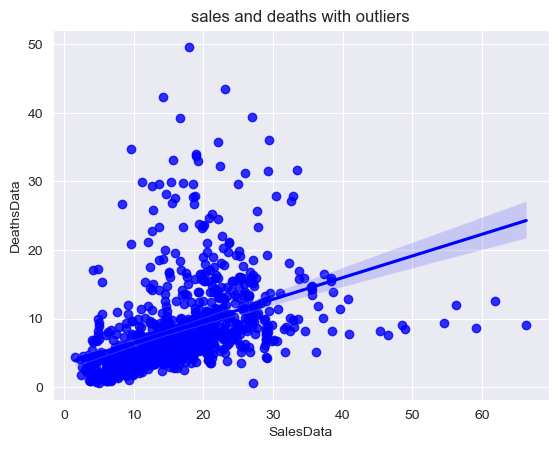

In [18]:
# linear regression to check relationship between x and y
sns.set_style("darkgrid")
sns.color_palette("rocket")
sns.regplot(x="SalesData", y="DeathsData", data=df, color='blue')
plt.title("sales and deaths with outliers")

<Axes: xlabel='DeathsData'>

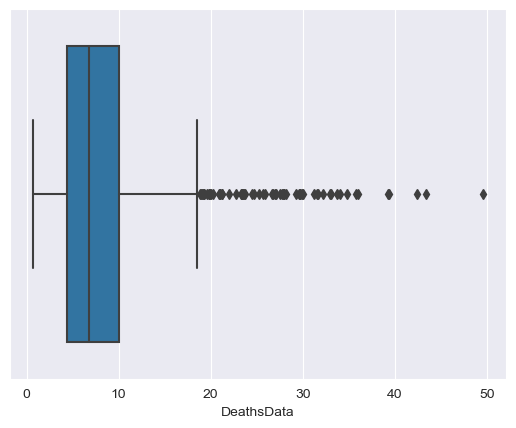

In [60]:
# check for outliers
sns.boxplot(x=df["DeathsData"])

<Axes: xlabel='SalesData'>

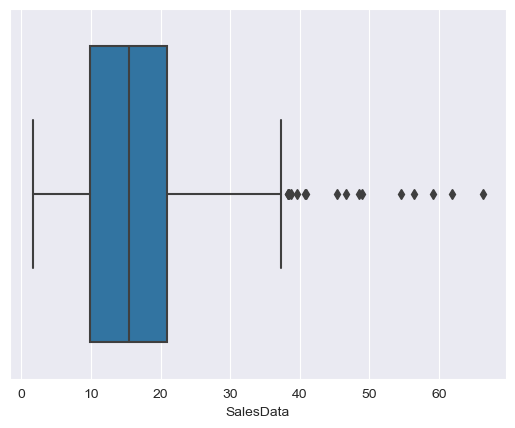

In [61]:
sns.boxplot(x=df["SalesData"])

In [9]:
# define 95% of samples
percentile_95_deaths = df['DeathsData'].quantile(0.95)
percentile_95_sales = df['SalesData'].quantile(0.95)
print(percentile_95_deaths)
print(percentile_95_sales)

13.635279999999996
26.243467499999994


In [21]:
# remove 5% of samples
df1 = df.query('DeathsData < 16 & SalesData < 29')


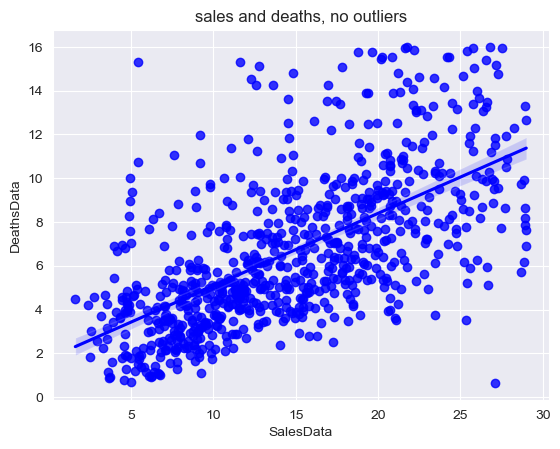

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Plot the regression plot for the filtered data
sns.regplot(x='SalesData', y='DeathsData', data=df1, color='blue', label='lala')
# Add a title to the graph
plt.title('sales and deaths, no outliers')
# Display the plot
plt.show()


In [24]:
import pandas as pd
# Calculate the correlation coefficient
correlation = df['SalesData'].corr(df['DeathsData'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.4074133882873144


In [31]:
df_test = df[["Location","TimeFrame","SalesData","DeathsData"]]
df_test

,Location,TimeFrame,SalesData,DeathsData
0,Alabama,2000,6.74399,0.98993
1,Alabama,2001,7.79399,1.29709
2,Alabama,2002,7.80123,1.61198
3,Alabama,2003,9.26128,1.10769
4,Alabama,2004,9.10411,1.84700
...,...,...,...,...
964,Wyoming,2014,20.63788,9.29636
965,Wyoming,2015,21.83413,7.89044
966,Wyoming,2016,20.73213,8.74569
967,Wyoming,2017,18.12706,8.73564
